# Run Any Kind of OLS Regression (ANOVA, GLM, etc.)

### Authors: Calvin Howard.

#### Last updated: July 6, 2023

Use this to run/test a statistical model (e.g., regression or T-tests) on a spreadsheet.

Notes:
- To best use this notebook, you should be familar with GLM design and Contrast Matrix design. See this webpage to get started:
[FSL's GLM page](https://fsl.fmrib.ox.ac.uk/fsl/fslwiki/GLM)

# 00 - Import CSV with All Data
**The CSV is expected to be in this format**
- ID and absolute paths to niftis are critical
```
+-----+----------------------------+--------------+--------------+--------------+
| ID  | Nifti_File_Path            | Covariate_1  | Covariate_2  | Covariate_3  |
+-----+----------------------------+--------------+--------------+--------------+
| 1   | /path/to/file1.nii.gz      | 0.5          | 1.2          | 3.4          |
| 2   | /path/to/file2.nii.gz      | 0.7          | 1.4          | 3.1          |
| 3   | /path/to/file3.nii.gz      | 0.6          | 1.5          | 3.5          |
| 4   | /path/to/file4.nii.gz      | 0.9          | 1.1          | 3.2          |
| ... | ...                        | ...          | ...          | ...          |
+-----+----------------------------+--------------+--------------+--------------+
```

Prep Output Direction

In [ ]:
# Specify where you want to save your results to
out_dir = '/Users/cu135/Library/CloudStorage/OneDrive-Personal/OneDrive_Documents/Research/2023/subiculum_cognition_and_age/figures/Figures/supplementary_subiculum_conn'

Import Data

In [ ]:
# Specify the path to your CSV file containing NIFTI paths
input_csv_path = '/Users/cu135/Dropbox (Partners HealthCare)/studies/cognition_2023/metadata/master_list_proper_subjects.xlsx'
sheet = 'master_list_proper_subjects'

In [ ]:
from calvin_utils.permutation_analysis_utils.statsmodels_palm import CalvinStatsmodelsPalm
# Instantiate the PalmPrepararation class
cal_palm = CalvinStatsmodelsPalm(input_csv_path=input_csv_path, output_dir=out_dir, sheet=sheet)
# Call the process_nifti_paths method
data_df = cal_palm.read_and_display_data()

# 01 - Preprocess Your Data

**Handle NANs**
- Set drop_nans=True is you would like to remove NaNs from data
- Provide a column name or a list of column names to remove NaNs from

In [ ]:
data_df.columns

In [ ]:
drop_list = ['Subiculum_Connectivity_T_Redone']

In [ ]:
data_df = cal_palm.drop_nans_from_columns(columns_to_drop_from=drop_list)
display(data_df)

**Drop Row Based on Value of Column**

Define the column, condition, and value for dropping rows
- column = 'your_column_name'
- condition = 'above'  # Options: 'equal', 'above', 'below'

In [ ]:
data_df.columns

Set the parameters for dropping rows

In [ ]:
column = 'City'  # The column you'd like to evaluate
condition = 'equal'  # The condition to check ('equal', 'above', 'below', 'not')
value = 'BWH' # The value to drop if found

In [ ]:
data_df, other_df = cal_palm.drop_rows_based_on_value(column, condition, value)
display(data_df)

**Standardize Data**
- Enter Columns you Don't want to standardize into a list

In [ ]:
# Remove anything you don't want to standardize
cols_not_to_standardize = None # ['Z_Scored_Percent_Cognitive_Improvement_By_Origin_Group', 'Z_Scored_Subiculum_T_By_Origin_Group_'] #['Age']

In [ ]:
data_df = cal_palm.standardize_columns(cols_not_to_standardize)
data_df

In [ ]:
# for col in data_df.columns:
#     if 'CSF' and 'eh' not in col:
#         data_df[col] = data_df[col] * -1

# 02 - Compare Distributions Across 2 Categories

In [49]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp

def ks_test_and_plot_cdf(sample1, sample2):
    # Calculate the Kolmogorov-Smirnov statistic and p-value
    ks_stat, p_value = ks_2samp(sample1, sample2)
    print(f"KS Statistic: {ks_stat}")
    print(f"P-value: {p_value}")

    # Sort the samples for CDF plotting
    sorted_sample1 = np.sort(sample1)
    sorted_sample2 = np.sort(sample2)
    cdf1 = np.arange(1, len(sorted_sample1) + 1) / len(sorted_sample1)
    cdf2 = np.arange(1, len(sorted_sample2) + 1) / len(sorted_sample2)

    # Plotting the CDFs
    plt.figure(figsize=(10, 6))
    plt.step(sorted_sample1, cdf1, label='CDF Sample 1', where='post')
    plt.step(sorted_sample2, cdf2, label='CDF Sample 2', where='post')
    plt.title('CDF Comparison of Two Samples')
    plt.xlabel('Sample Values')
    plt.ylabel('CDF')
    plt.legend()
    sns.despine()
    plt.grid(False)
    plt.savefig('/Users/cu135/Library/CloudStorage/OneDrive-Personal/OneDrive_Documents/Research/2023/subiculum_cognition_and_age/figures/Figures/supplementary_subiculum_conn/distribution_figures/kolog_smir/SBC_KS.svg')
    plt.show()

def pivot_dataframe(df, concat_col, category_col):
    # Create a new DataFrame where each unique category becomes a column
    # and the values from concat_col are listed under these category columns
    # First, ensure that the index is reset for the DataFrame to avoid issues during pivoting
    df.reset_index(drop=True, inplace=True)

    # Create a new DataFrame where each row will have the category as a column and the corresponding values
    # from concat_col under that category
    pivoted_df = df.pivot(columns=category_col, values=concat_col)
    
    return pivoted_df

In [46]:
data_df.columns

Index(['subject', 'Age', 'Normalized_Percent_Cognitive_Improvement',
       'Z_Scored_Percent_Cognitive_Improvement_By_Origin_Group',
       'Z_Scored_Percent_Cognitive_Improvement',
       'Percent_Cognitive_Improvement',
       'Z_Scored_Subiculum_T_By_Origin_Group_',
       'Z_Scored_Subiculum_Connectivity_T', 'Subiculum_Connectivity_T_Redone',
       'Subiculum_Connectivity_T', 'Amnesia_Lesion_T_Map', 'Memory_Network_T',
       'Z_Scored_Memory_Network_R', 'Memory_Network_R',
       'Subiculum_Grey_Matter', 'Subiculum_White_Matter', 'Subiculum_CSF',
       'Subiculum_Total', 'Standardized_Age',
       'Standardized_Percent_Improvement',
       'Standardized_Subiculum_Connectivity',
       'Standardized_Subiculum_Grey_Matter',
       'Standardized_Subiculum_White_Matter', 'Standardized_Subiculum_CSF',
       'Standardized_Subiculum_Total', 'Disease', 'Cohort', 'City',
       'Inclusion_Cohort', 'Categorical_Age_Group', 'Age_Group',
       'Age_And_Disease', 'Age_Disease_and_Cohort',

In [50]:
pdf = pivot_dataframe(data_df, 'Subiculum_Connectivity_T_Redone', 'City')
pdf

City,Toronto,Wurzburg
0,21.150595,NaN
1,19.702349,NaN
2,23.231614,NaN
3,22.172312,NaN
4,21.546222,NaN
...,...,...
73,NaN,17.978233
74,NaN,14.611144
75,NaN,21.551613
76,NaN,20.200341


KS Statistic: 0.24358974358974358
P-value: 0.01922582971456673


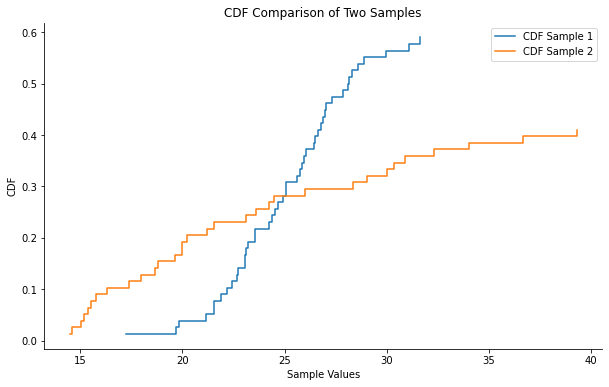

In [51]:
ks_test_and_plot_cdf(pdf['Toronto'], pdf['Wurzburg'])
